In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
x = pd.read_csv("winequality_white_x_train_orig.csv")

x 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.083478,0.445455,0.244186,0.661290
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.113553,0.272727,0.383721,0.548387
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.117602,0.563636,0.279070,0.596774
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.089069,0.554545,0.232558,0.677419
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.134760,0.563636,0.581395,0.241935
...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355


In [3]:
y = pd.read_csv("winequality_white_y_train_orig.csv")
y

,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
3276,0,0,0,1,0,0,0
3277,0,0,0,1,0,0,0
3278,0,0,0,1,0,0,0
3279,0,0,0,1,0,0,0


In [4]:
y =y.idxmax(axis=1)
y

0       7
1       5
2       6
3       7
4       6
       ..
3276    6
3277    6
3278    6
3279    6
3280    8
Length: 3281, dtype: object

In [5]:
df_normalized = pd.concat([x, y], axis=1)
df_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,0
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.083478,0.445455,0.244186,0.661290,7
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.113553,0.272727,0.383721,0.548387,5
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.117602,0.563636,0.279070,0.596774,6
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.089069,0.554545,0.232558,0.677419,7
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.134760,0.563636,0.581395,0.241935,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452,6
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806,6
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387,6
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355,6


In [6]:
df_normalized.rename(columns={df_normalized.columns[-1]: 'Quality'}, inplace=True)
df_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.083478,0.445455,0.244186,0.661290,7
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.113553,0.272727,0.383721,0.548387,5
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.117602,0.563636,0.279070,0.596774,6
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.089069,0.554545,0.232558,0.677419,7
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.134760,0.563636,0.581395,0.241935,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452,6
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806,6
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387,6
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355,6


<AxesSubplot: xlabel='Quality', ylabel='count'>

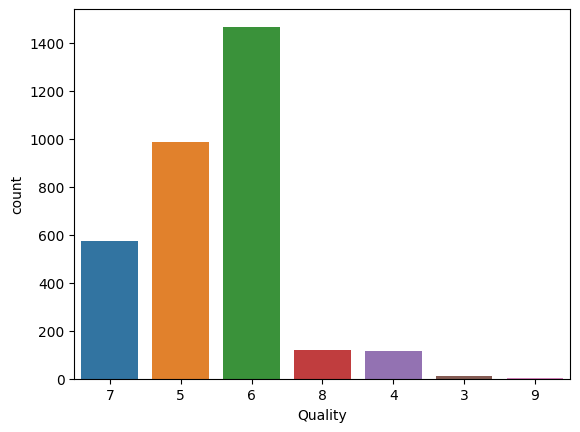

In [7]:
sns.countplot(x='Quality',data = df_normalized)

In [8]:
df_normalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,0.294540,0.195197,0.201022,0.089458,0.108379,0.115985,0.299649,0.133856,0.427018,0.313323,0.405349
std,0.081351,0.099306,0.072704,0.079092,0.063487,0.058485,0.097496,0.058790,0.136756,0.132040,0.198698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.003484,0.002320,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.077151,0.073171,0.229698,0.088876,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127048,0.418182,0.290698,0.387097
75%,0.336538,0.240196,0.228916,0.144172,0.121662,0.153310,0.368910,0.173703,0.518182,0.383721,0.548387
max,0.769231,1.000000,1.000000,1.000000,1.000000,0.503484,0.692575,1.000000,1.000000,0.976744,1.000000


In [28]:
df_normalized.corr()

C:\Users\AGABALES\AppData\Local\Temp\ipykernel_748\1431787392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normalized.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.016061,0.302359,0.085507,0.024263,-0.048015,0.091226,0.260211,-0.431723,-0.006669,-0.117953
volatile acidity,-0.016061,1.000000,-0.119266,0.063565,0.058864,-0.097530,0.093977,0.037158,-0.022250,-0.051471,0.065553
citric acid,0.302359,-0.119266,1.000000,0.096285,0.129006,0.100307,0.134479,0.152835,-0.171897,0.064075,-0.075633
residual sugar,0.085507,0.063565,0.096285,1.000000,0.096788,0.316092,0.411559,0.844977,-0.185872,-0.034694,-0.452628
chlorides,0.024263,0.058864,0.129006,0.096788,1.000000,0.094742,0.192827,0.256417,-0.098500,0.017599,-0.357297
free sulfur dioxide,-0.048015,-0.097530,0.100307,0.316092,0.094742,1.000000,0.617268,0.308754,0.006218,0.050595,-0.264288
total sulfur dioxide,0.091226,0.093977,0.134479,0.411559,0.192827,0.617268,1.000000,0.533003,0.002791,0.119651,-0.453943
density,0.260211,0.037158,0.152835,0.844977,0.256417,0.308754,0.533003,1.000000,-0.091081,0.073806,-0.769838
pH,-0.431723,-0.022250,-0.171897,-0.185872,-0.098500,0.006218,0.002791,-0.091081,1.000000,0.152643,0.124818
sulphates,-0.006669,-0.051471,0.064075,-0.034694,0.017599,0.050595,0.119651,0.073806,0.152643,1.000000,-0.024526


C:\Users\AGABALES\AppData\Local\Temp\ipykernel_748\1807697357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_normalized.corr())


<AxesSubplot: >

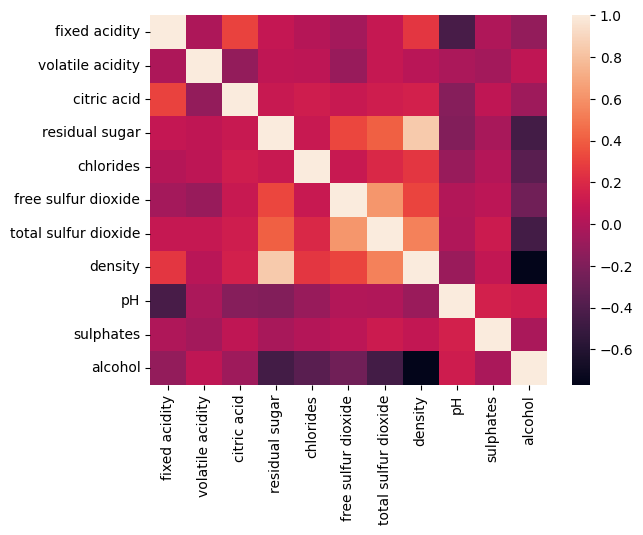

In [9]:
sns.heatmap(df_normalized.corr())

In [10]:
clf = LinearRegression()
X = df_normalized[['alcohol','sulphates']]
Y = df_normalized['Quality']

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(df_normalized,Y,test_size= 0.2)

In [12]:
X_train.to_csv("white_wine_xtrain.csv",index =False)

In [13]:
Y_train.to_csv("white_wine_ytrain.csv",index =False)

In [14]:
X_test.to_csv("white_wine_xtest.csv",index =False)

In [15]:
Y_test.to_csv("white_wine_ytest.csv",index =False)

In [27]:
Y_test

808     6
2399    7
305     6
975     5
1876    8
       ..
1987    5
2548    7
210     6
2758    5
823     7
Name: Quality, Length: 657, dtype: object

In [16]:
clf.fit(X_train,Y_train)

LinearRegression()

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

C:\Training\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array(['6', '7', '6', '5', '8', '5', '7', '6', '6', '6', '7', '6', '6',
       '6', '7', '5', '7', '7', '7', '6', '5', '5', '8', '5', '6', '5',
       '6', '7', '5', '4', '7', '6', '7', '6', '5', '5', '5', '5', '6',
       '4', '6', '6', '6', '6', '7', '6', '7', '6', '6', '5', '4', '8',
       '6', '6', '5', '6', '6', '7', '7', '7', '7', '6', '5', '6', '5',
       '6', '7', '5', '6', '5', '6', '6', '6', '6', '5', '8', '5', '5',
       '7', '6', '6', '5', '5', '5', '6', '7', '5', '6', '7', '5', '7',
       '6', '5', '6', '5', '6', '6', '5', '7', '4', '6', '6', '5', '5',
       '6', '6', '8', '5', '4', '5', '4', '7', '6', '7', '7', '5', '5',
       '6', '7', '6', '6', '7', '6', '6', '6', '5', '5', '6', '6', '5',
       '6', '6', '7', '6', '7', '6', '6', '6', '6', '6', '5', '5', '5',
       '7', '5', '5', '5', '7', '8', '6', '7', '7', '5', '6', '5', '6',
       '6', '5', '7', '6', '5', '5', '5', '5', '6', '6', '6', '5', '5',
       '7', '7', '5', '7', '7', '5', '6', '6', '6', '4', '5', '6

In [20]:
from sklearn import datasets, linear_model,metrics


In [21]:
print("Logistic Regression Accuracy  (in %):", metrics.accuracy_score(Y_test,y_pred)*100)

Logistic Regression Accuracy  (in %): 95.8904109589041


In [22]:
from sklearn.neural_network import MLPClassifier
nnmodel = MLPClassifier(hidden_layer_sizes=(30,50))

In [23]:
nnmodel.fit(X_train,Y_train)

C:\Training\ML\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 50))

In [24]:
nnpredicted_class = nnmodel.predict(X_test)
accuracy_score(Y_test,nnpredicted_class)

0.9984779299847792

In [25]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,nnpredicted_class)
print(report)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       212
           6       1.00      1.00      1.00       283
           7       1.00      1.00      1.00       105
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00         1

    accuracy                           1.00       657
   macro avg       1.00      1.00      1.00       657
weighted avg       1.00      1.00      1.00       657



In [26]:
from joblib import dump, load
dump(nnmodel, "whitewinearn.joblib")

['whitewinearn.joblib']